In [17]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [18]:
import plotly.graph_objects as go
import plotly.express as px

In [19]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [20]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [21]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/SWT/SeaT_baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [22]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/SWT/SeaT_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

### EU Seasonal Average of SWT

In [23]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [24]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2035', '2045'))

In [25]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2035', '2045'))

In [26]:
data_baseline_plot = data_baseline.votemper.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.votemper.mean(dim=('y', 'x', 'deptht'))

In [27]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

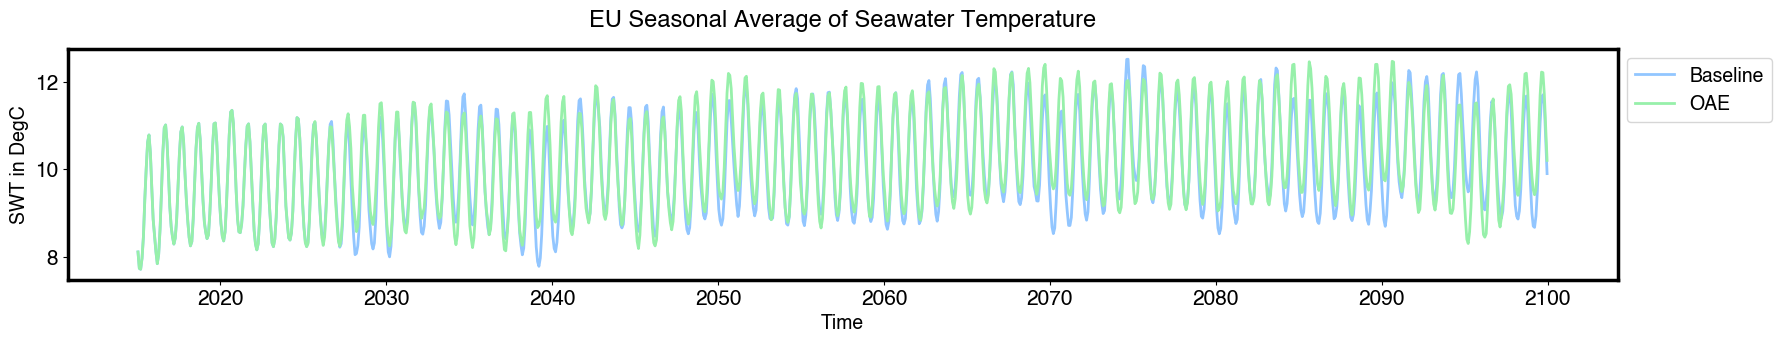

In [28]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.votemper, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.votemper, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of SWT', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [29]:
sliced_frame_baseline_plot = sliced_frame_baseline.votemper.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.votemper.mean(dim=('y', 'x', 'deptht'))

In [30]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

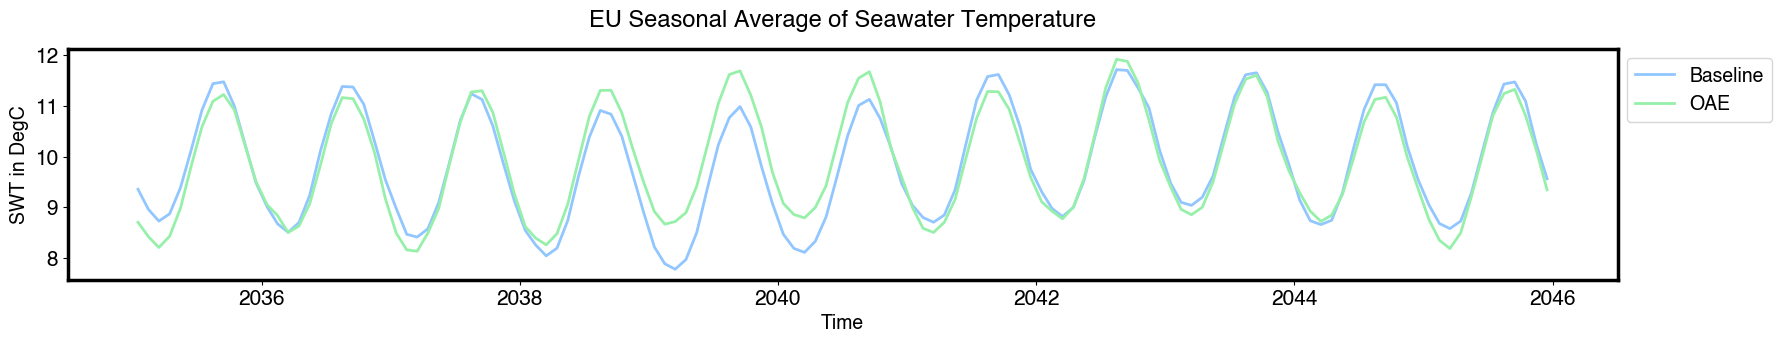

In [31]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.votemper, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.votemper, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of SWT', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of SWT

In [32]:
start_date = "2035-01-01"
end_date = "2045-01-01"

votemper_baseline = data_baseline["votemper"].sel(time_counter=slice(start_date, end_date))

In [33]:
votemper_season_summary_baseline = votemper_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_season_mean_all_years_baseline = votemper_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
votemper_seasonal_mean_baseline = votemper_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [34]:
start_date = "2035-01-01"
end_date = "2045-01-01"

votemper_oae = data_oae["votemper"].sel(time_counter=slice(start_date, end_date))

In [35]:
votemper_season_summary_oae = votemper_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_season_mean_all_years_oae = votemper_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
votemper_seasonal_mean_oae = votemper_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

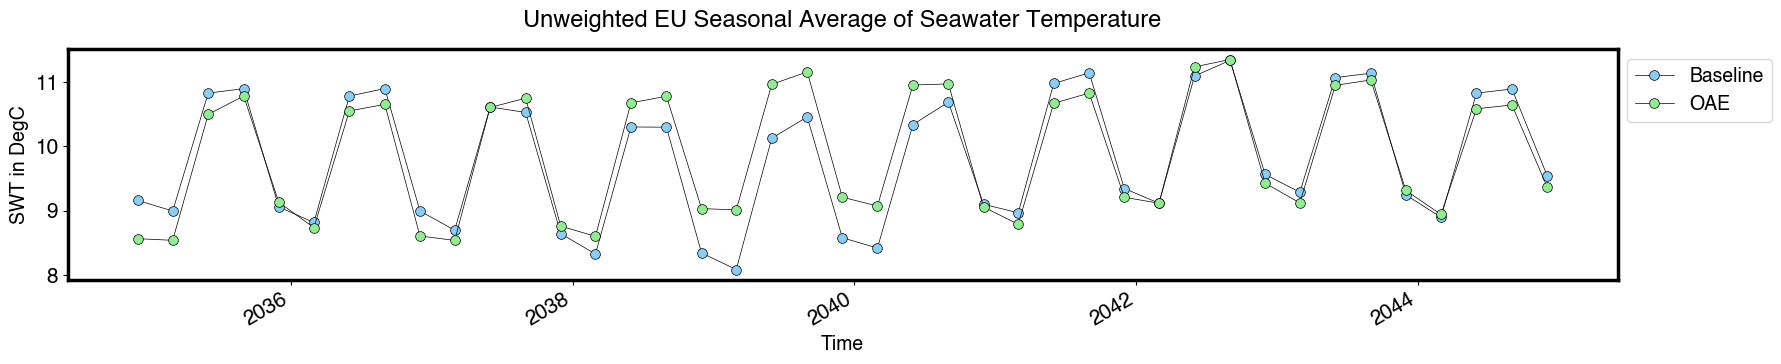

In [36]:
f, ax = plt.subplots(figsize=(20, 3))

votemper_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of SWT", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of SWT

In [37]:
month_length_baseline = votemper_baseline.time_counter.dt.days_in_month
votemper_weighted_mean_baseline = ((votemper_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
votemper_weighted_mean_baseline = votemper_weighted_mean_baseline.where(votemper_weighted_mean_baseline)
votemper_weighted_season_baseline = votemper_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [38]:
month_length_oae = votemper_oae.time_counter.dt.days_in_month
votemper_weighted_mean_oae = ((votemper_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
votemper_weighted_mean_oae = votemper_weighted_mean_oae.where(votemper_weighted_mean_oae)
votemper_weighted_season_oae = votemper_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

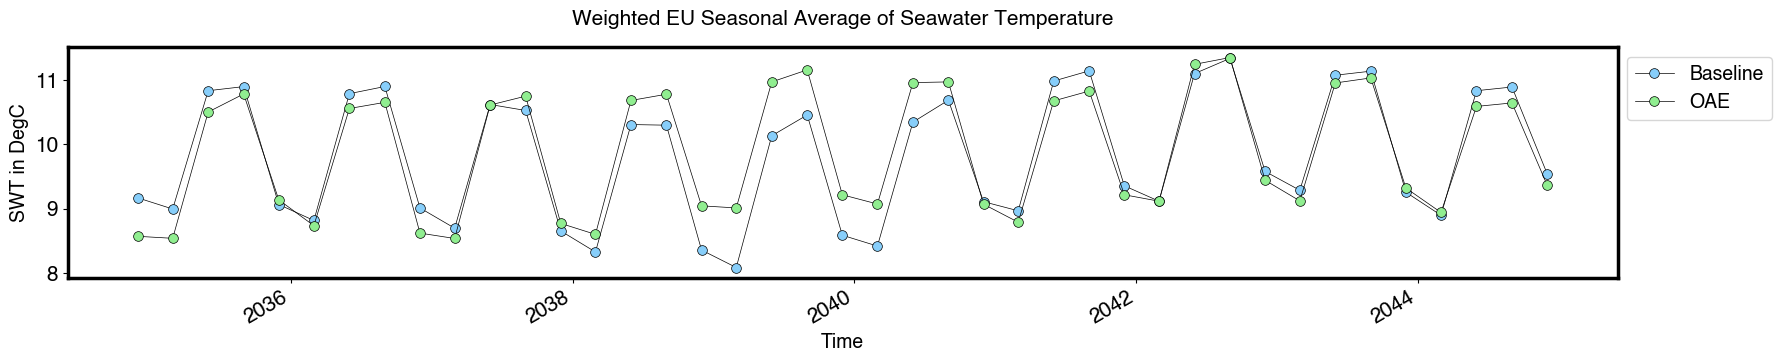

In [39]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
votemper_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of SWT", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of SWT (seasons displayed)

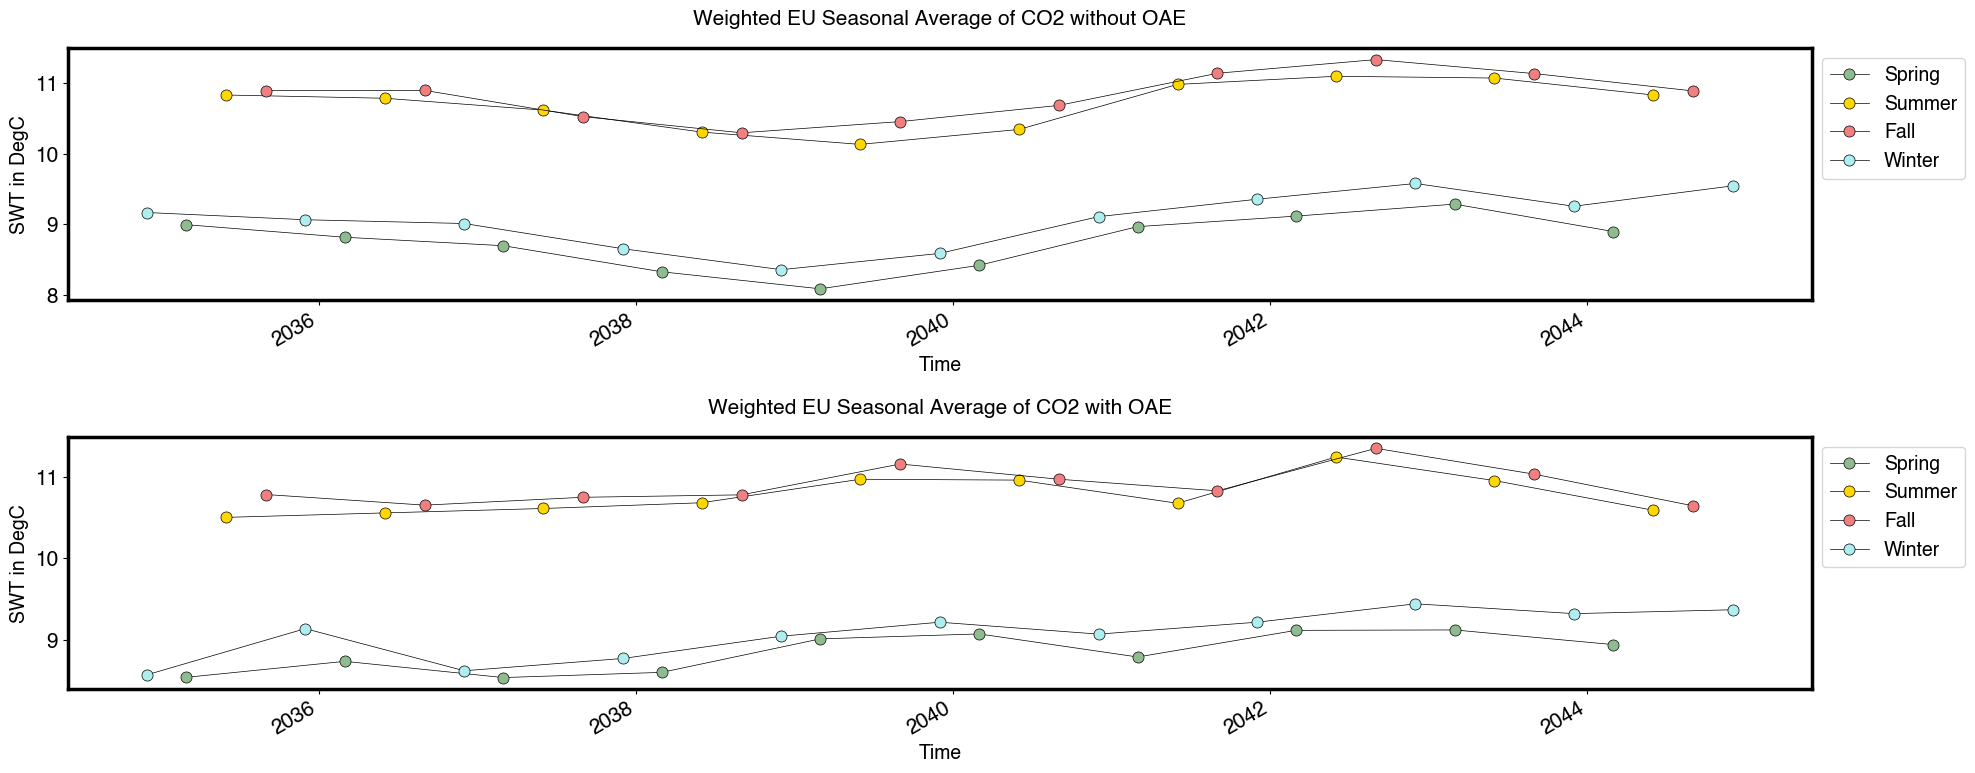

In [40]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in votemper_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('SWT in DegC', fontsize=14)

for month, arr in votemper_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('SWT in DegC', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of SWT without OAE (seasons displayed)

In [41]:
votemper_weighted_baseline = votemper_weighted_season_baseline.to_dataframe('votemper')
votemper_weighted_baseline['Month'] = pd.DatetimeIndex(votemper_weighted_baseline.index).month

In [42]:
conditions = [
    (votemper_weighted_baseline['Month'] == 3),
    (votemper_weighted_baseline['Month'] == 6),
    (votemper_weighted_baseline['Month'] == 9),
    (votemper_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

votemper_weighted_baseline['Month'] = np.select(conditions, values)

In [43]:
colors = dict(zip(votemper_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

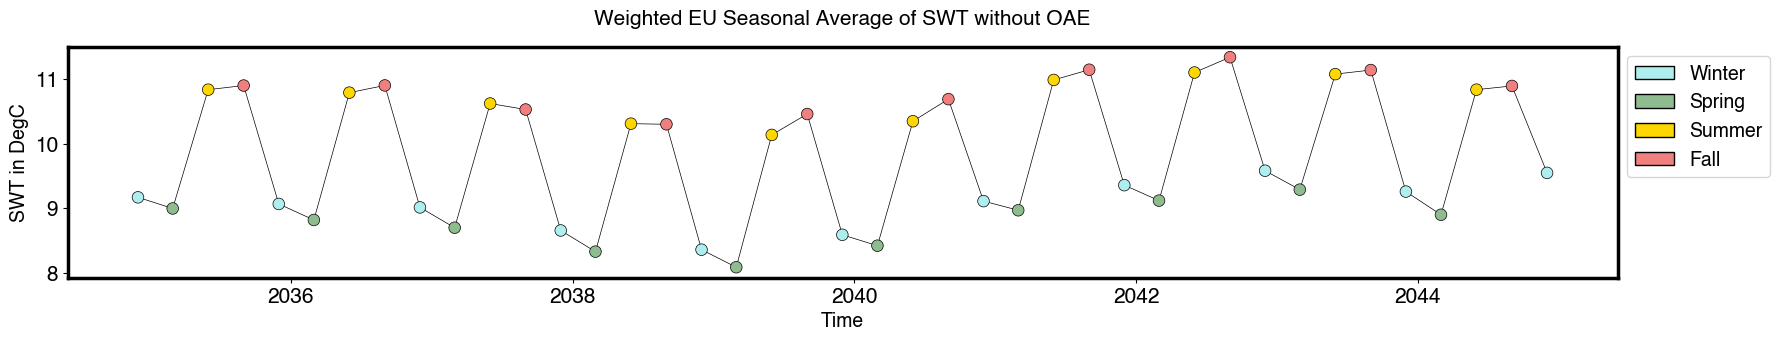

In [44]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper, color=votemper_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SWT in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of SWT without OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of SWT with OAE (seasons displayed)

In [45]:
votemper_weighted_oae = votemper_weighted_season_oae.to_dataframe('votemper')
votemper_weighted_oae['Month'] = pd.DatetimeIndex(votemper_weighted_oae.index).month

In [46]:
conditions = [
    (votemper_weighted_oae['Month'] == 3),
    (votemper_weighted_oae['Month'] == 6),
    (votemper_weighted_oae['Month'] == 9),
    (votemper_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

votemper_weighted_oae['Month'] = np.select(conditions, values)

In [47]:
colors = dict(zip(votemper_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

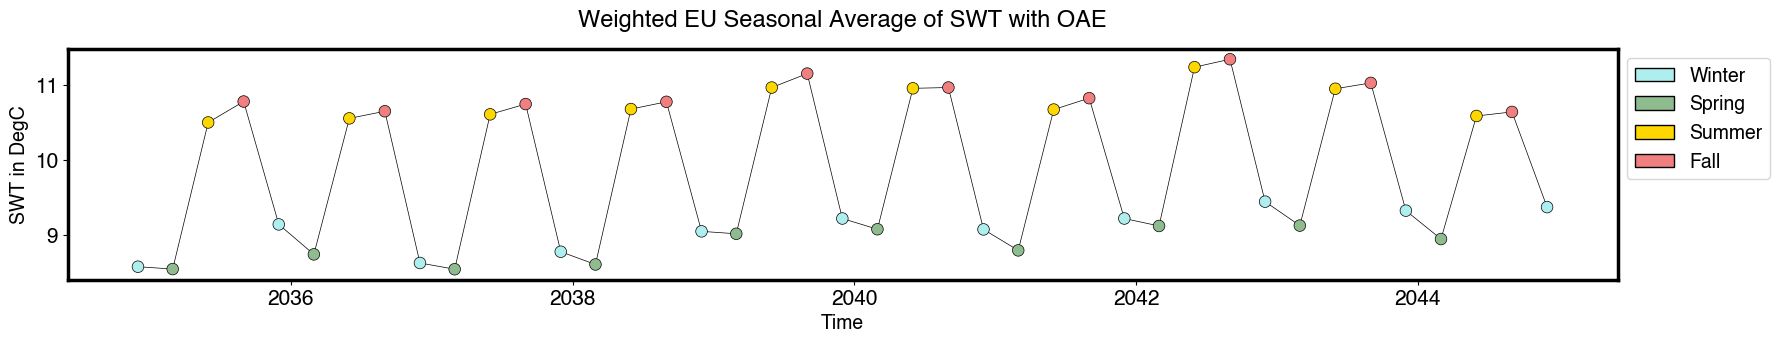

In [48]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_weighted_oae.index, votemper_weighted_oae.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_oae.index, votemper_weighted_oae.votemper, color=votemper_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SWT in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of SWT with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of SWT (seasons displayed)

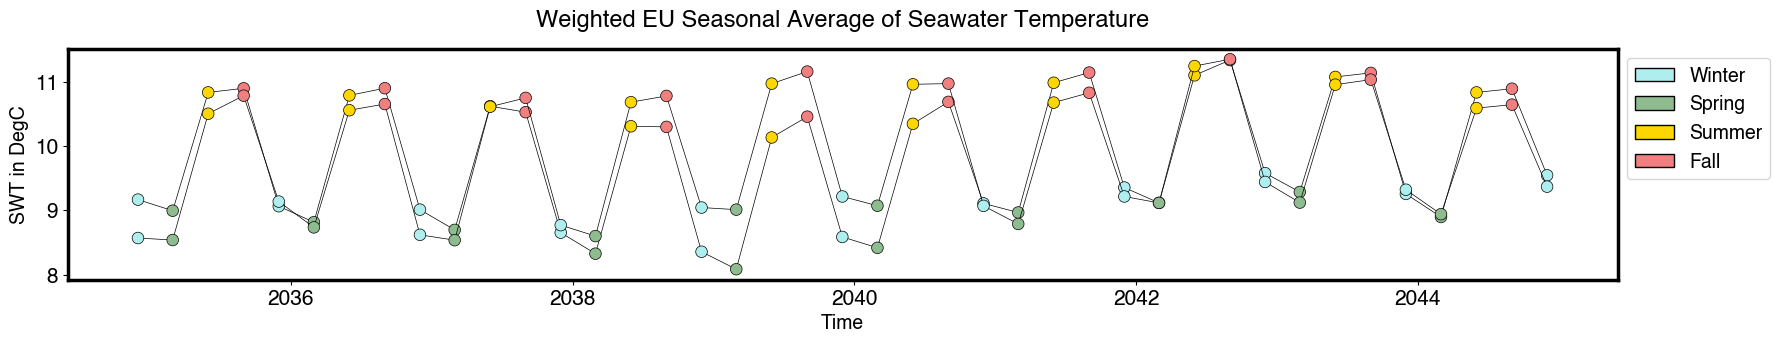

In [49]:
colors = dict(zip(votemper_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper, color=votemper_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(votemper_weighted_oae.index, votemper_weighted_oae.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_oae.index, votemper_weighted_oae.votemper, color=votemper_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SWT in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of SWT", fontsize=17, y=1.06)

pass

### EU Monthly Averaged votemper for the last 10 years

In [50]:
mean_baseline = (sliced_frame_baseline.votemper.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).votemper.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [51]:
mean_oae = (sliced_frame_oae.votemper.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).votemper.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

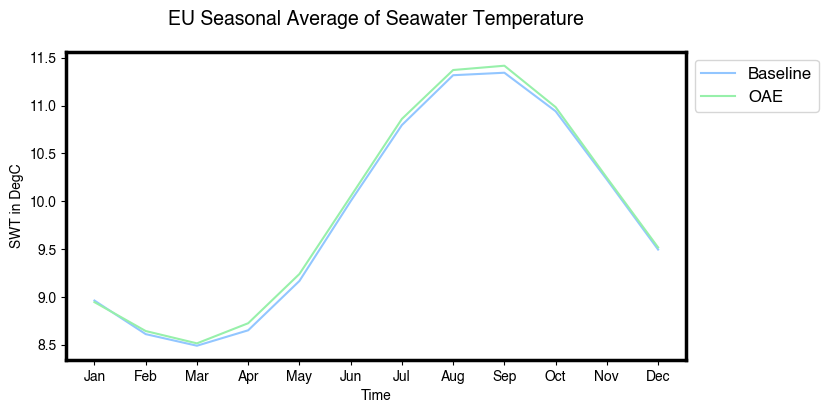

In [52]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.votemper, label='Baseline')
plt.plot(mean_oae.votemper, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("SWT in DegC", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of SWT', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of SWT from 2035 to 2045 without OAE

In [53]:
sliced_frame_baseline = sliced_frame_baseline.votemper.mean(dim=('deptht'))

In [54]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [55]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [56]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='votemper')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='votemper')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='votemper')

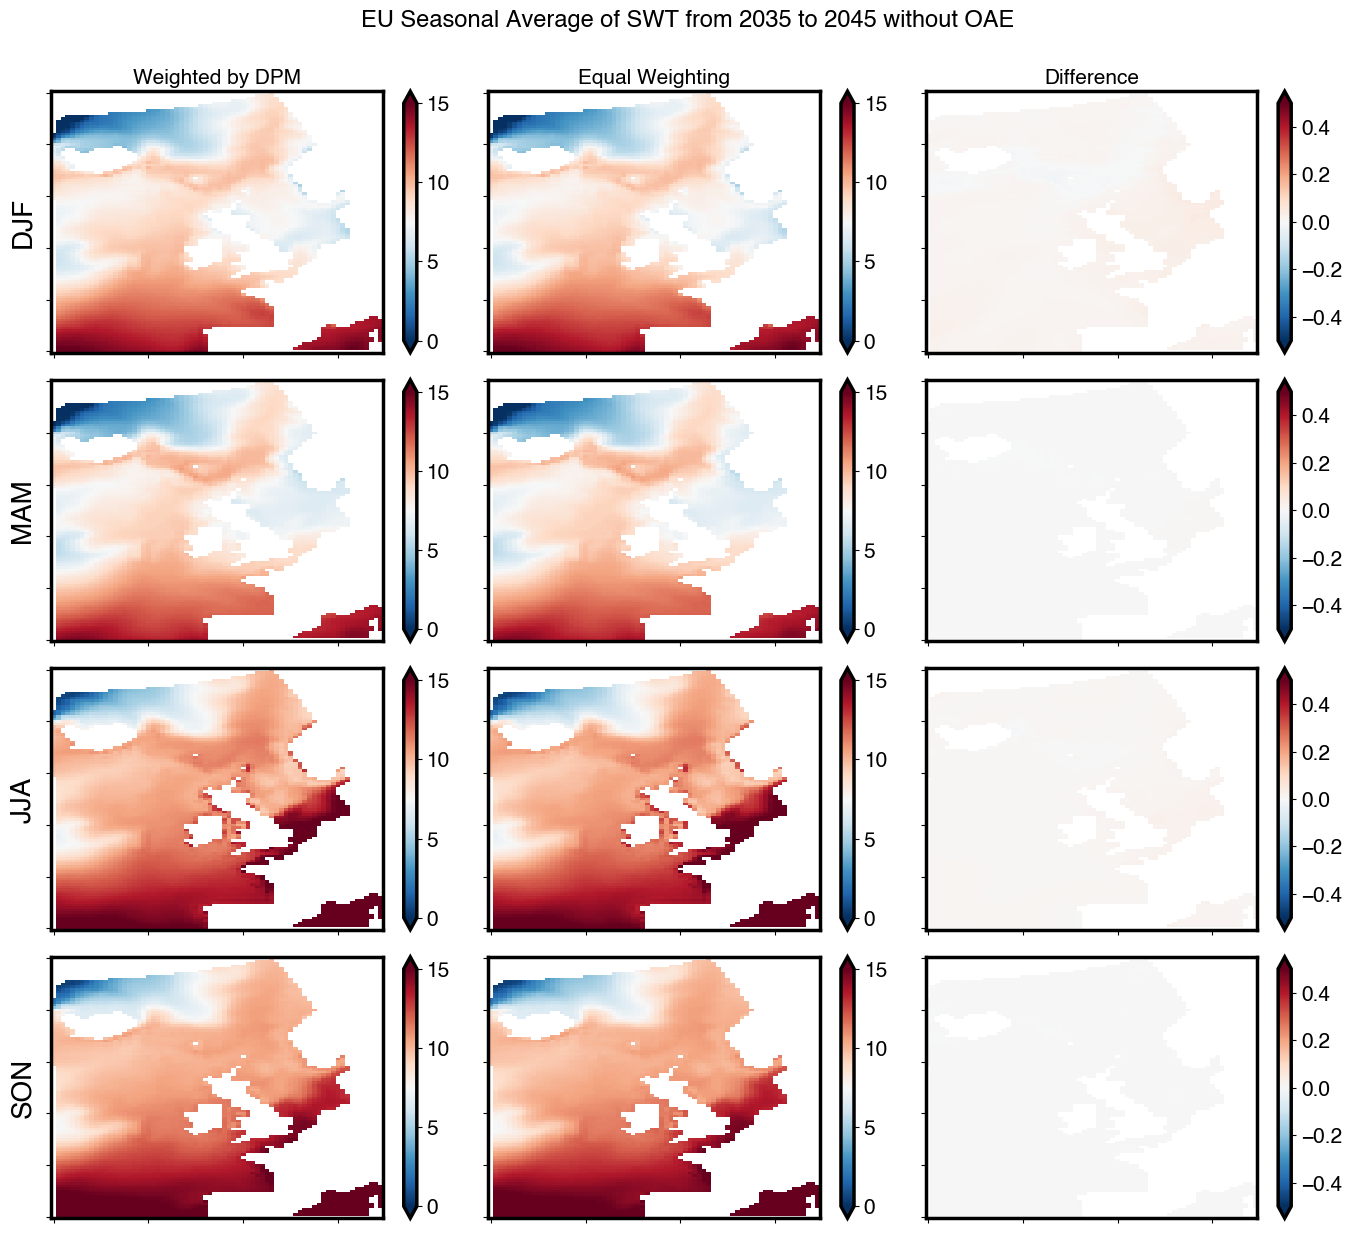

In [57]:
notnull = pd.notnull(ds_unweighted_baseline["votemper"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=0,
        vmax=15,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=0,
        vmax=15,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of SWT from 2035 to 2045 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of SWT from 2035 to 2045 with OAE

In [58]:
sliced_frame_oae = sliced_frame_oae.votemper.mean(dim=('deptht'))

In [59]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [60]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [61]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='votemper')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='votemper')
ds_diff_oae = ds_diff_oae.to_dataset(name='votemper')

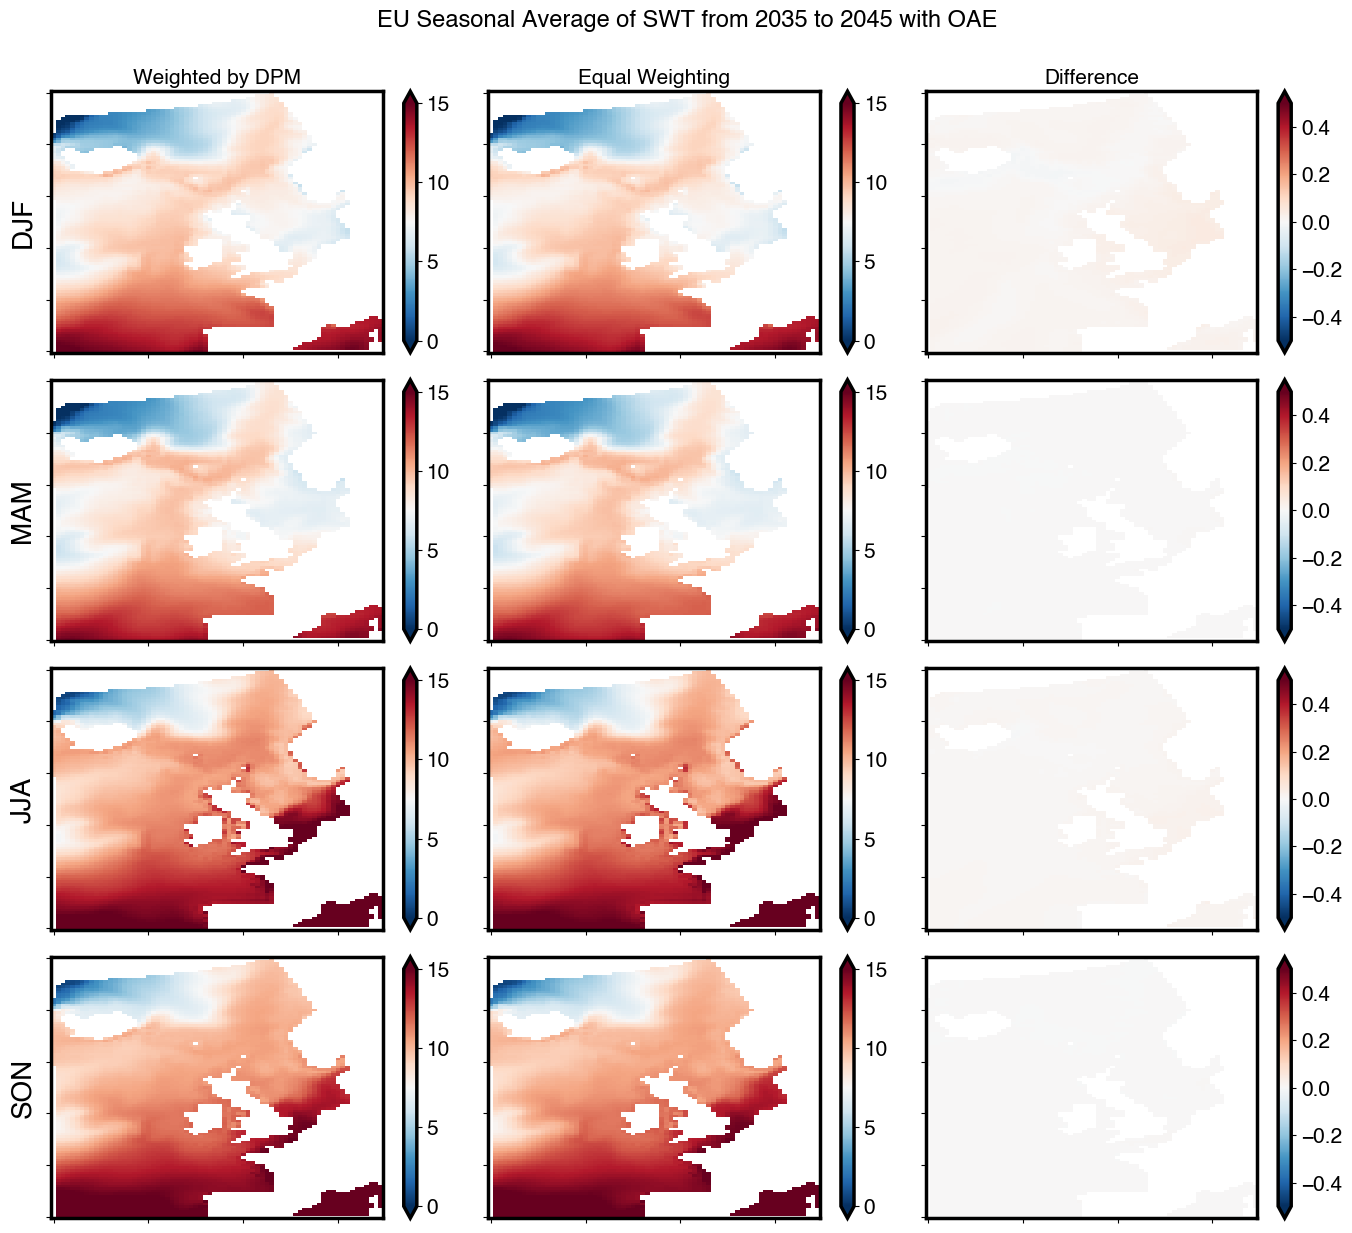

In [62]:
notnull = pd.notnull(ds_unweighted_baseline["votemper"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=0,
        vmax=15,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=0,
        vmax=15,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["votemper"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of SWT from 2035 to 2045 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of SWT from 2035 to 2045 without OAE

In [77]:
start_date_month = "2035-01-01"
end_date_month = "2045-01-01"

votemper_baseline_month = data_baseline["votemper"].sel(time_counter=slice(start_date_month, end_date_month))
votemper_monthly_mean_baseline = votemper_baseline_month.groupby('time_counter').mean(["y", "x", "deptht"])

In [78]:
votemper_oae_month = data_oae["votemper"].sel(time_counter=slice(start_date_month, end_date_month))
votemper_monthly_mean_oae = votemper_oae_month.groupby('time_counter').mean(["y", "x", "deptht"])

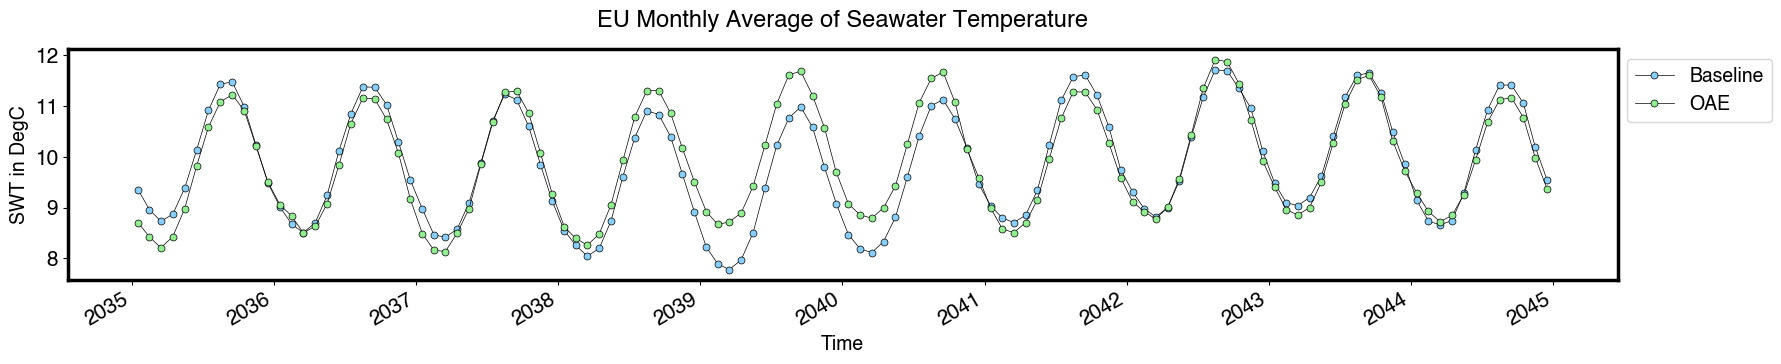

In [79]:
f, ax = plt.subplots(figsize=(20, 3))

votemper_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of SWT", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of SWT from 2035 to 2045 without OAE

In [80]:
votemper_baseline_monthly = votemper_monthly_mean_baseline.to_dataframe('votemper')
votemper_baseline_monthly['Month'] = pd.DatetimeIndex(votemper_baseline_monthly.index).month

In [81]:
conditions = [
    (votemper_baseline_monthly['Month'] == 1),
    (votemper_baseline_monthly['Month'] == 2),
    (votemper_baseline_monthly['Month'] == 3),
    (votemper_baseline_monthly['Month'] == 4),
    (votemper_baseline_monthly['Month'] == 5),
    (votemper_baseline_monthly['Month'] == 6),
    (votemper_baseline_monthly['Month'] == 7),
    (votemper_baseline_monthly['Month'] == 8),
    (votemper_baseline_monthly['Month'] == 9),
    (votemper_baseline_monthly['Month'] == 10),
    (votemper_baseline_monthly['Month'] == 11),
    (votemper_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

votemper_baseline_monthly['Month'] = np.select(conditions, values)

In [82]:
colors = dict(zip(votemper_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

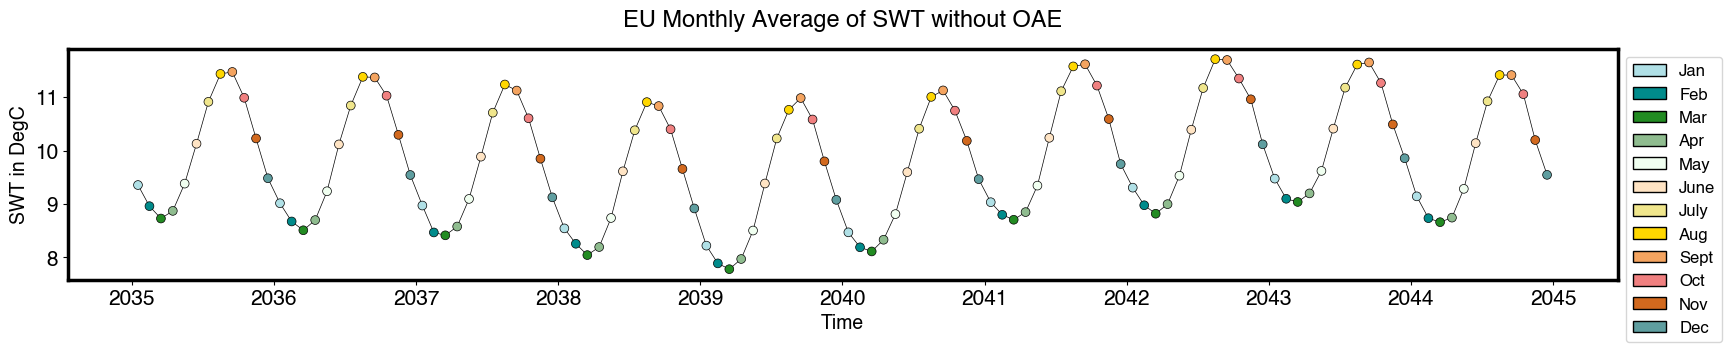

In [83]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, color=votemper_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SWT in DegC', fontsize=14)
ax.set_title("EU Monthly Average of SWT without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of SWT from 2035 to 2045 with OAE

In [84]:
votemper_oae_monthly = votemper_monthly_mean_oae.to_dataframe('votemper')
votemper_oae_monthly['Month'] = pd.DatetimeIndex(votemper_oae_monthly.index).month

In [85]:
conditions = [
    (votemper_oae_monthly['Month'] == 1),
    (votemper_oae_monthly['Month'] == 2),
    (votemper_oae_monthly['Month'] == 3),
    (votemper_oae_monthly['Month'] == 4),
    (votemper_oae_monthly['Month'] == 5),
    (votemper_oae_monthly['Month'] == 6),
    (votemper_oae_monthly['Month'] == 7),
    (votemper_oae_monthly['Month'] == 8),
    (votemper_oae_monthly['Month'] == 9),
    (votemper_oae_monthly['Month'] == 10),
    (votemper_oae_monthly['Month'] == 11),
    (votemper_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

votemper_oae_monthly['Month'] = np.select(conditions, values)

In [86]:
colors = dict(zip(votemper_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

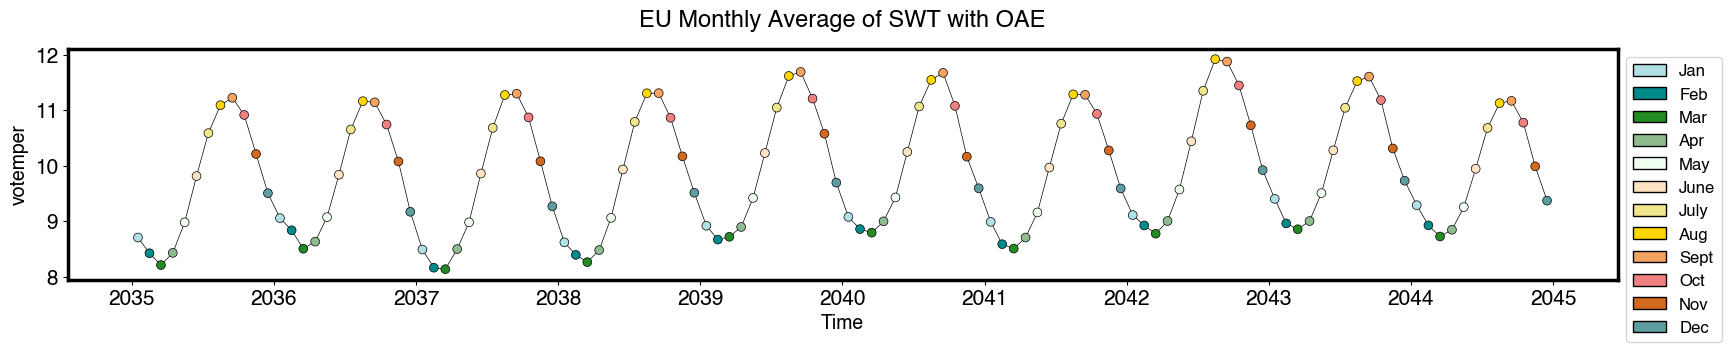

In [87]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_oae_monthly.index, votemper_oae_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_oae_monthly.index, votemper_oae_monthly.votemper, color=votemper_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('votemper', fontsize=14)
ax.set_title("EU Monthly Average of SWT with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of SWT from 2035 to 2045 with and without OAE

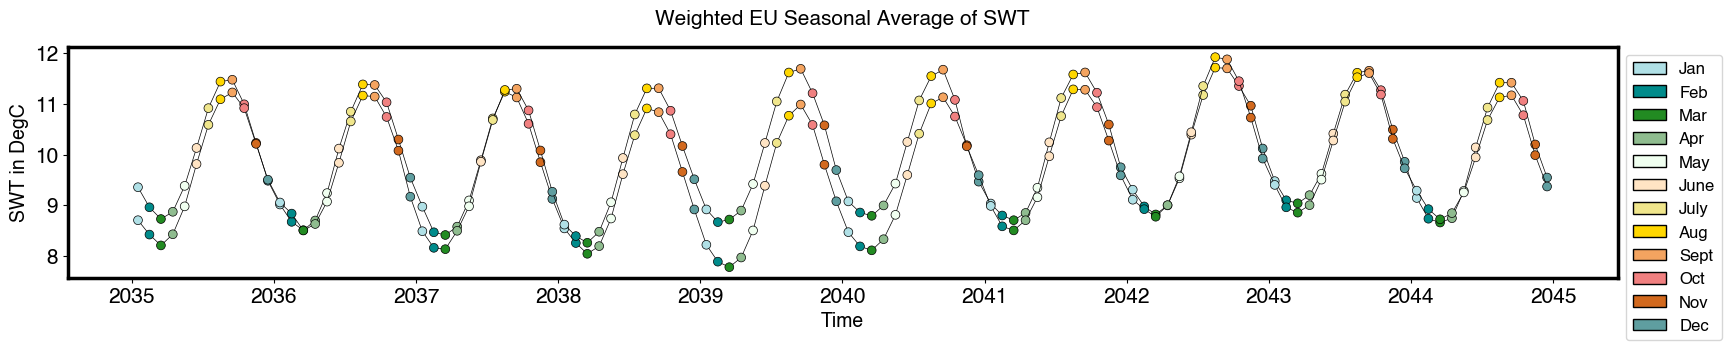

In [92]:
colors = dict(zip(votemper_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, color=votemper_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(votemper_oae_monthly.index, votemper_oae_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_oae_monthly.index, votemper_oae_monthly.votemper, color=votemper_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SWT in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of SWT", fontsize=15, y=1.06)

pass

### Δ SWT between Baseline and OAE from 2035 to 2045

In [93]:
delta_votemper = votemper_oae_monthly.votemper - votemper_baseline_monthly.votemper

In [94]:
delta_votemper = delta_votemper.to_xarray()

In [95]:
delta_votemper = delta_votemper.to_dataframe('votemper')
delta_votemper['Month'] = pd.DatetimeIndex(delta_votemper.index).month

In [96]:
conditions = [
    (delta_votemper['Month'] == 1),
    (delta_votemper['Month'] == 2),
    (delta_votemper['Month'] == 3),
    (delta_votemper['Month'] == 4),
    (delta_votemper['Month'] == 5),
    (delta_votemper['Month'] == 6),
    (delta_votemper['Month'] == 7),
    (delta_votemper['Month'] == 8),
    (delta_votemper['Month'] == 9),
    (delta_votemper['Month'] == 10),
    (delta_votemper['Month'] == 11),
    (delta_votemper['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_votemper['Month'] = np.select(conditions, values)

In [97]:
colors = dict(zip(delta_votemper.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

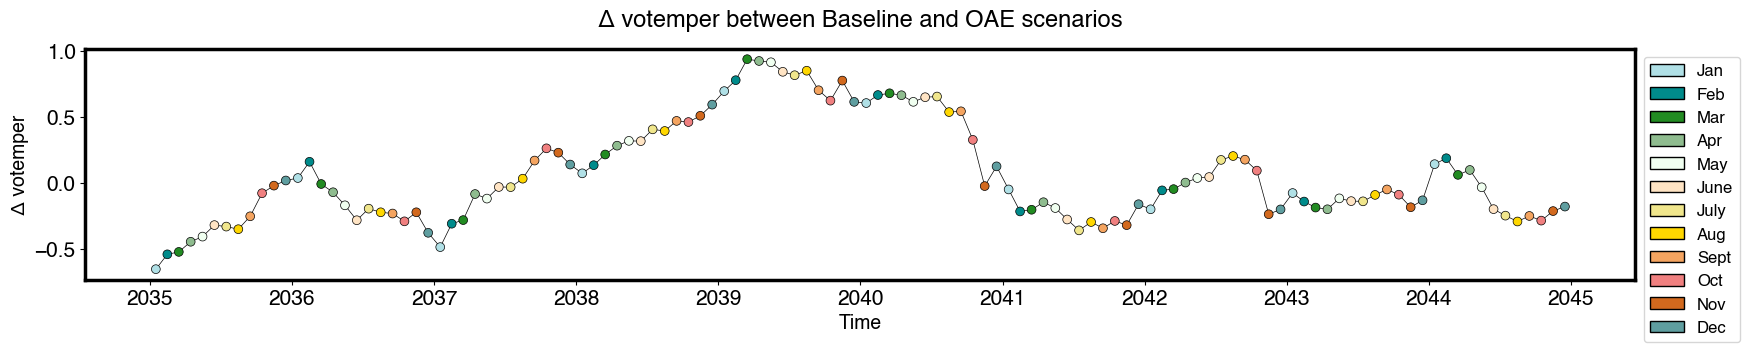

In [98]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_votemper.index, delta_votemper.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_votemper.index, delta_votemper.votemper, color=delta_votemper.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ votemper', fontsize=14)
ax.set_title("Δ votemper between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

### SWT Annual Amplitude without OAE

In [99]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [100]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['votemper'].idxmax().values]

In [101]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['votemper'].idxmin().values]

In [102]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [103]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [104]:
votemper_amplitude_baseline = year_max_baseline['votemper'] - year_min_baseline['votemper']

In [105]:
votemper_amplitude_baseline = votemper_amplitude_baseline.to_xarray()

In [106]:
votemper_amplitude_baseline = votemper_amplitude_baseline.to_dataset()

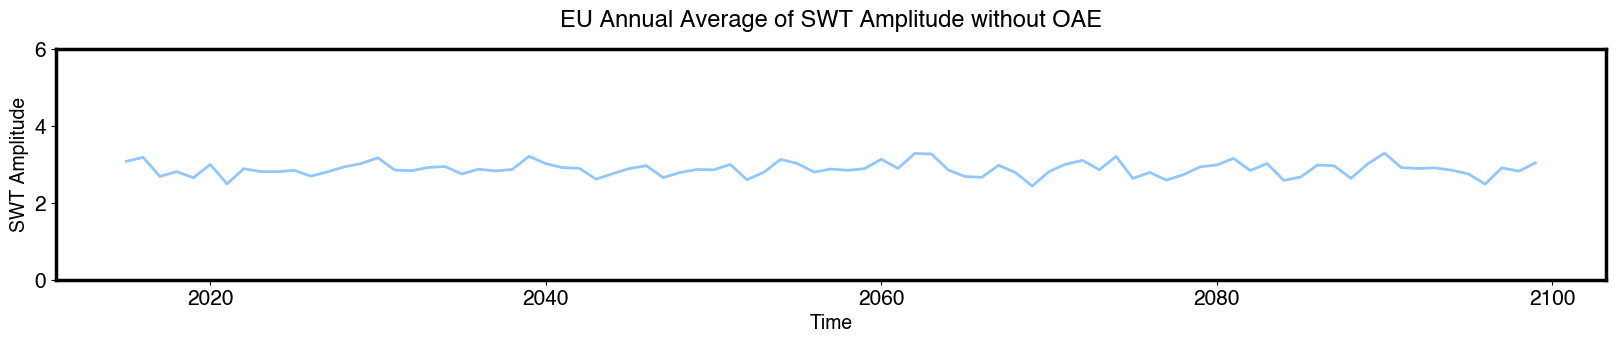

In [107]:
plt.figure(figsize=(20, 3))
plt.plot(votemper_amplitude_baseline.year, votemper_amplitude_baseline.votemper, linewidth=2)
plt.ylim(0, 6)
plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT Amplitude", fontsize=14)
plt.title('EU Annual Average of SWT Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### SWT Annual Amplitude with OAE

In [108]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [109]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['votemper'].idxmax().values]

In [110]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['votemper'].idxmin().values]

In [111]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [112]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [113]:
votemper_amplitude_oae = year_max_oae['votemper'] - year_min_oae['votemper']

In [114]:
votemper_amplitude_oae = votemper_amplitude_oae.to_xarray()

In [115]:
votemper_amplitude_oae = votemper_amplitude_oae.to_dataset()

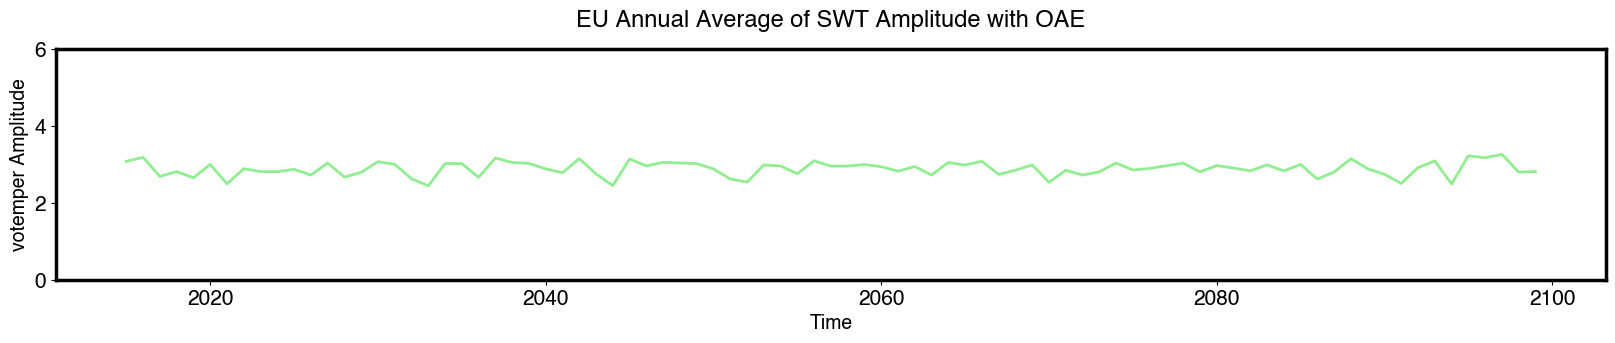

In [116]:
plt.figure(figsize=(20, 3))
plt.plot(votemper_amplitude_oae.year, votemper_amplitude_oae.votemper, linewidth=2, color='lightgreen')
plt.ylim(0, 6)
plt.xlabel("Time", fontsize=14)
plt.ylabel("votemper Amplitude", fontsize=14)
plt.title('EU Annual Average of SWT Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### SWT Annual Amplitude with and without OAE

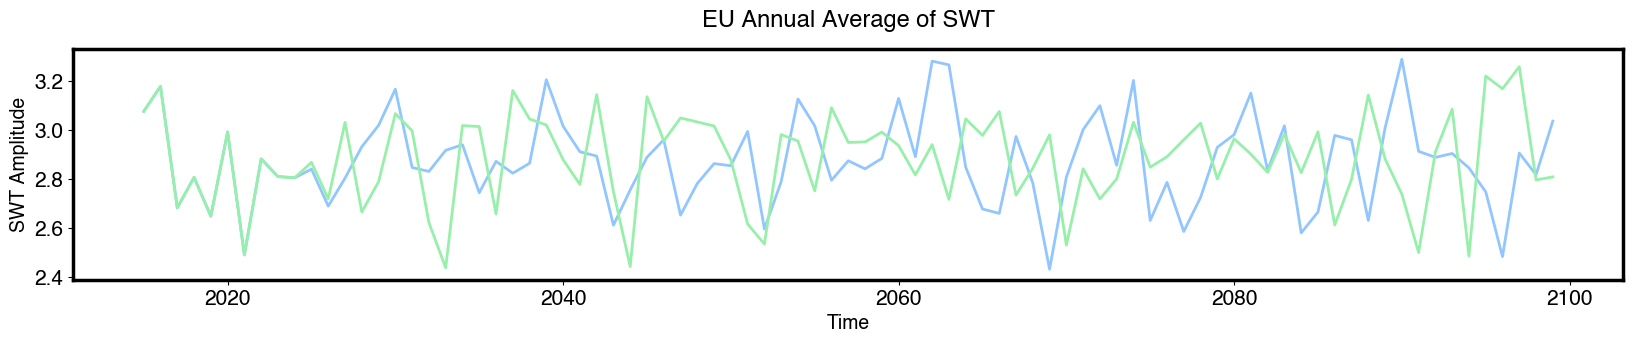

In [117]:
plt.figure(figsize=(20, 3))
plt.plot(votemper_amplitude_baseline.year, votemper_amplitude_baseline.votemper, linewidth=2, label = 'Baseline')
plt.plot(votemper_amplitude_oae.year, votemper_amplitude_oae.votemper, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("SWT Amplitude", fontsize=14)
plt.title('EU Annual Average of SWT', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()